In [14]:
# Deep Learning Fundamentals: MNIST Case Study
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

### Data Collection

In [ ]:
import requests

# URLs of the files
data_train_features_url = 'https://www.raphaelcousin.com/modules/module7/exercise/module7_exercise_train_features.csv'
data_train_labels_url = 'https://www.raphaelcousin.com/modules/module7/exercise/module7_exercise_train_labels.csv'
data_test_features_url = 'https://www.raphaelcousin.com/modules/module7/exercise/module7_exercise_test_features.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(data_train_features_url, 'module7_exercise_train_features.csv')
download_file(data_train_labels_url, 'module7_exercise_train_labels.csv')
download_file(data_test_features_url, 'module7_exercise_test_features.csv')

In [7]:
X = pd.read_csv('module7_exercise_train_features.csv').values
y = pd.read_csv('module7_exercise_train_labels.csv').values.ravel()

### Data Analysis

In [8]:
X.shape

(60000, 784)

In [9]:
y.shape

(60000,)

In [10]:
def plot_mnist_digits(X, y, num_examples=5, figsize=(15, 3)):
    # Create figure
    fig, axes = plt.subplots(1, num_examples, figsize=figsize)
    
    # Ensure axes is always a numpy array
    if num_examples == 1:
        axes = np.array([axes])
    
    # Plot each example
    for i in range(num_examples):
        # Reshape the flattened image back to 28x28
        img = X[i].reshape(28, 28)
        
        # Plot
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'Label: {y[i]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    return fig

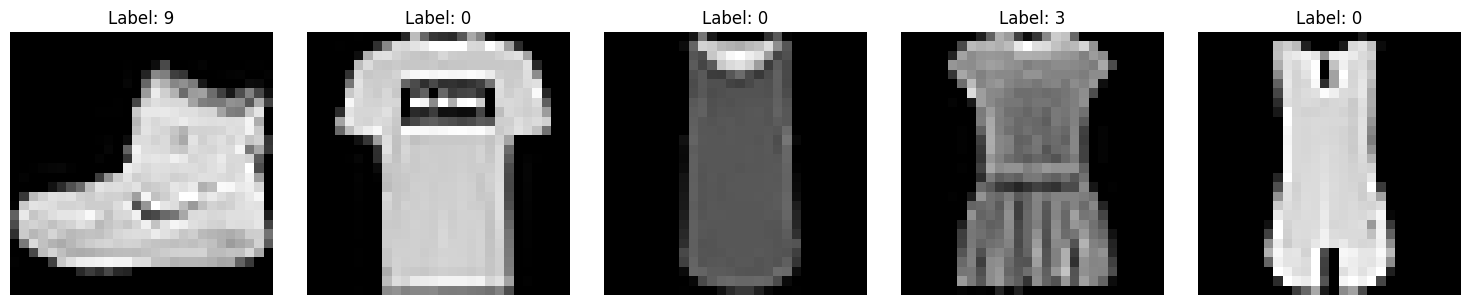

In [11]:
# Plot some examples
fig = plot_mnist_digits(X, y, num_examples=5)
plt.show()

### Data Preprocessing
Scale, split the data and create dataLoaders

In [ ]:
def preprocess_data(X, y, batch_size=32, train_size=0.7, val_size=0.15, random_state=42):
    return data_loader_train, data_loader_val, data_loader_test

### Model
Create a simple model with right input output and define criterion and criterion/loss

In [ ]:
def create_model():
    return model, criterion, optimizer

### Train
Create a loop to train your model

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer):
    history = defaultdict(list)
    for epoch in range(num_epochs):
        ...
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
    return history

In [ ]:
# Create model and training components
model, criterion, optimizer = create_model(device)

# Train the model
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=10
)

In [ ]:
def plot_training_history(history):
    """
    Plot training history
    
    Parameters:
    -----------
    history : dict
        Training history containing metrics
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 1, figsize=(10, 10))
    
    # Plot loss
    ax1.plot(history['train_loss'], label='Train Loss')
    ax1.plot(history['val_loss'], label='Val Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Plot accuracy
    ax2.plot(history['train_acc'], label='Train Acc')
    ax2.plot(history['val_acc'], label='Val Acc')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    return fig

In [ ]:
# Plot training history
plot_training_history(history)
plt.show()

In [12]:
### Improve your model and trainning

### Generating Submission File

In [13]:
X_test = pd.read_csv('module7_exercise_test_features.csv')
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

In [ ]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor)

In [ ]:
_, predicted_labels = torch.max(predictions, dim=1)

In [ ]:
submission = pd.DataFrame({
    'index': X_test.index,
    'label': 0 # predicted_labels
})

submission.to_csv('submission.csv', index=False, sep=',')
submission.head()